In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
# color pallette and font size
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow
font_size = 20

In [3]:
#File Path 
file_path = '/Users/dinaeshs/Covid_19_India/data/all_date.csv'
coloumn_list = ['Total Cases','Total Cured','Total Death','Total Active','Date']

In [4]:
#Creating Data_frame
ind_covid_df = pd.read_csv(file_path,header=None, names=coloumn_list)
formated_date_column = pd.to_datetime(ind_covid_df.Date,format='%Y-%m-%d %H:%M')
ind_covid_df['Date'] = formated_date_column
ind_covid_df.set_index('Date',inplace=True)

In [5]:
#Adding new calculated columns
resampled = ind_covid_df.resample('D').max().ffill().astype(int)
resampled['Daily New Cases'] = resampled['Total Cases'].diff().fillna(method='bfill')
resampled['Daily Cured Cases'] = resampled['Total Cured'].diff().fillna(method='bfill')
resampled['Daily New Death'] = resampled['Total Death'].diff().fillna(method='bfill')
resampled = resampled.astype(int)

In [6]:
resampled.columns = resampled.columns.str.replace(r' ','_',regex=True)

In [7]:
#added on april 10th,2020 - New coloumn - CFR - Case Fatality Rate
resampled['CFR'] = (resampled.Total_Death/resampled.Total_Cases)*100
#https://www.worldometers.info/coronavirus/coronavirus-death-rate/#correct

In [8]:
resampled.tail()

,Total_Cases,Total_Cured,Total_Death,Total_Active,Daily_New_Cases,Daily_Cured_Cases,Daily_New_Death,CFR
Date,,,,,,,,
2020-04-30,34866,9059,1154,24653,3534,1363,147,3.309815
2020-05-01,37262,10021,1231,26010,2396,962,77,3.303634
2020-05-02,39829,10500,1300,28029,2567,479,69,3.263953
2020-05-03,42546,11000,1350,28500,2717,500,50,3.173036
2020-05-04,42836,11762,1389,29685,290,762,39,3.242600


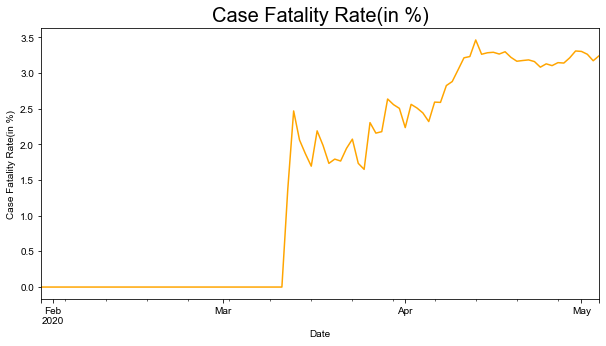

In [9]:
#added on april 10th,2020 - New plot - CFR - Case Fatality Rate and added log scale for y axis
fig6, ax11 = plt.subplots(figsize=(10,5))
resampled.CFR.plot(kind='line',ax=ax11,color='orange')
ax11.set_title('Case Fatality Rate(in %)',fontsize=font_size)
#ax11.set_yscale('log')
ax11.set_ylabel('Case Fatality Rate(in %)')

#plt.tight_layout()
plt.style.use('seaborn')

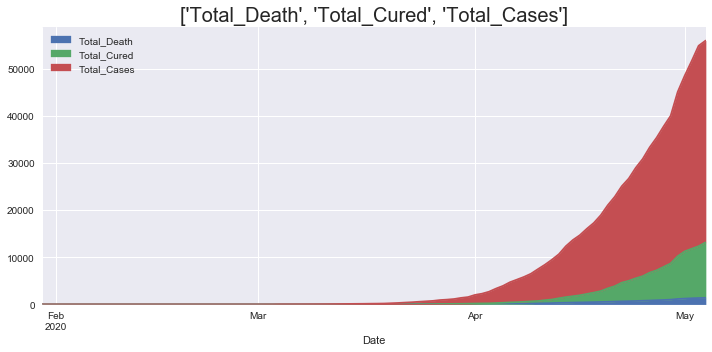

In [10]:
fig1, ax0 = plt.subplots(figsize = (10,5))
col_name = ['Total_Death','Total_Cured','Total_Cases']
resampled[col_name].plot(kind = 'area', ax=ax0)
#ax0.set_ylabel(col_name)
ax0.set_title(col_name,fontsize=font_size)
plt.tight_layout()
plt.style.use('seaborn')

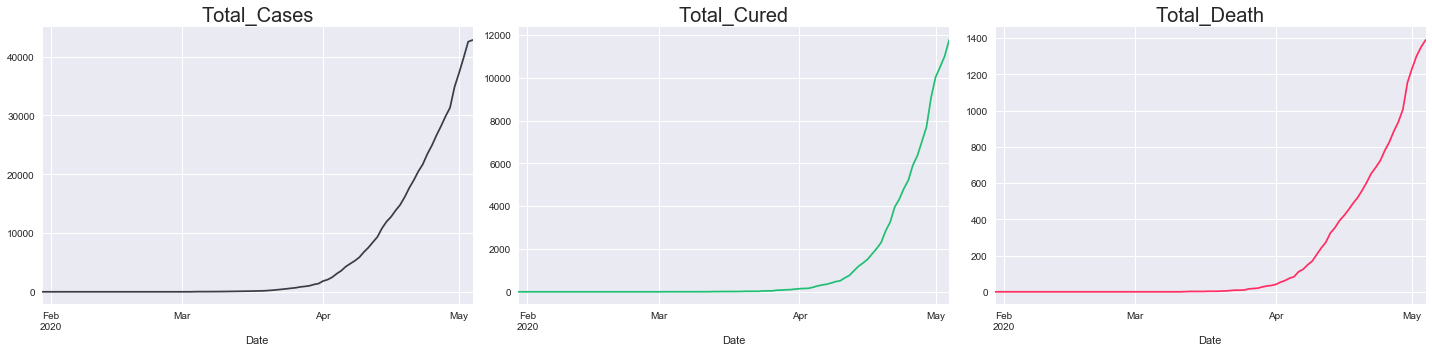

In [11]:
fig1, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize = (20,5))

resampled.Total_Cases.plot(ax=ax1,color = cnf)
resampled.Total_Cured.plot(ax=ax2,color = rec)
resampled.Total_Death.plot(ax=ax3,color = dth)

ax1.set_title('Total_Cases',fontsize=font_size)
ax2.set_title('Total_Cured',fontsize=font_size)
ax3.set_title('Total_Death',fontsize=font_size)

#April 10th,2020 added log scale for y axis
#ax1.set_yscale('log')
#ax2.set_yscale('log')
#ax3.set_yscale('log')

fig1.tight_layout()
plt.style.use('seaborn')

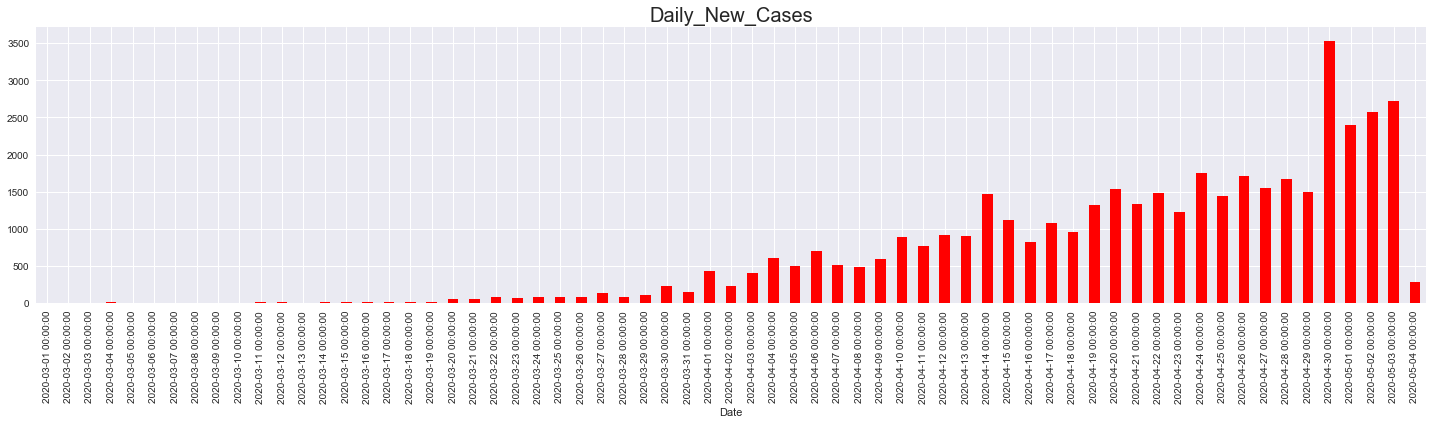

In [12]:
fig2 , ax4 = plt.subplots(figsize=(20,6))
resampled.Daily_New_Cases['2020-03':].plot(kind = 'bar', ax=ax4,color='r')

ax4.set_title('Daily_New_Cases',fontsize=font_size)

plt.tight_layout()
plt.style.use('seaborn')

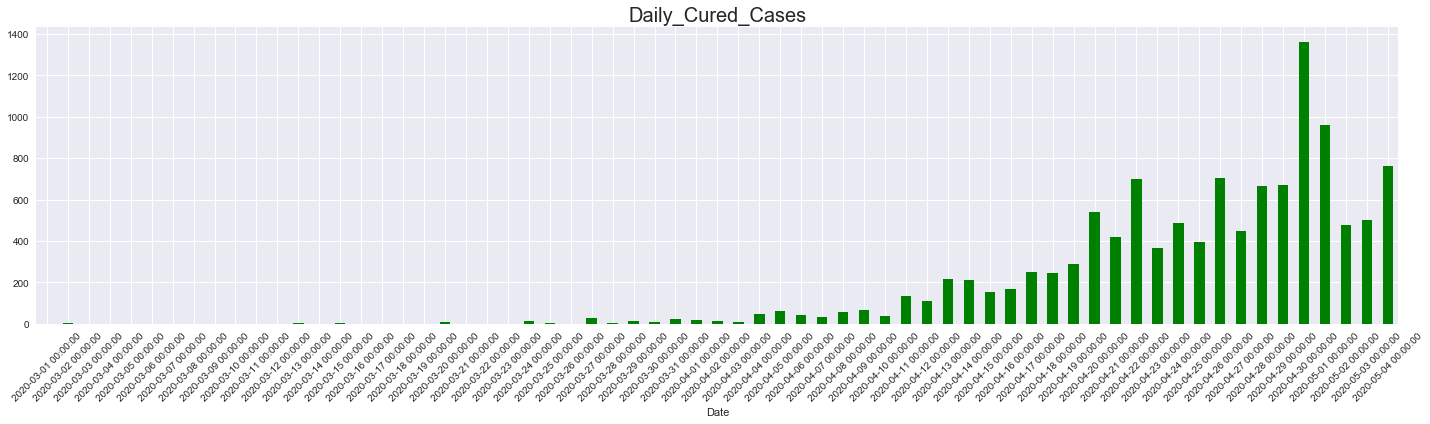

In [13]:
fig3 , ax5 = plt.subplots(figsize=(20,6))
resampled.Daily_Cured_Cases['2020-03':].plot(kind = 'bar', ax=ax5,color='g',rot=45)

ax5.set_title('Daily_Cured_Cases',fontsize=font_size)

plt.tight_layout()
plt.style.use('seaborn')

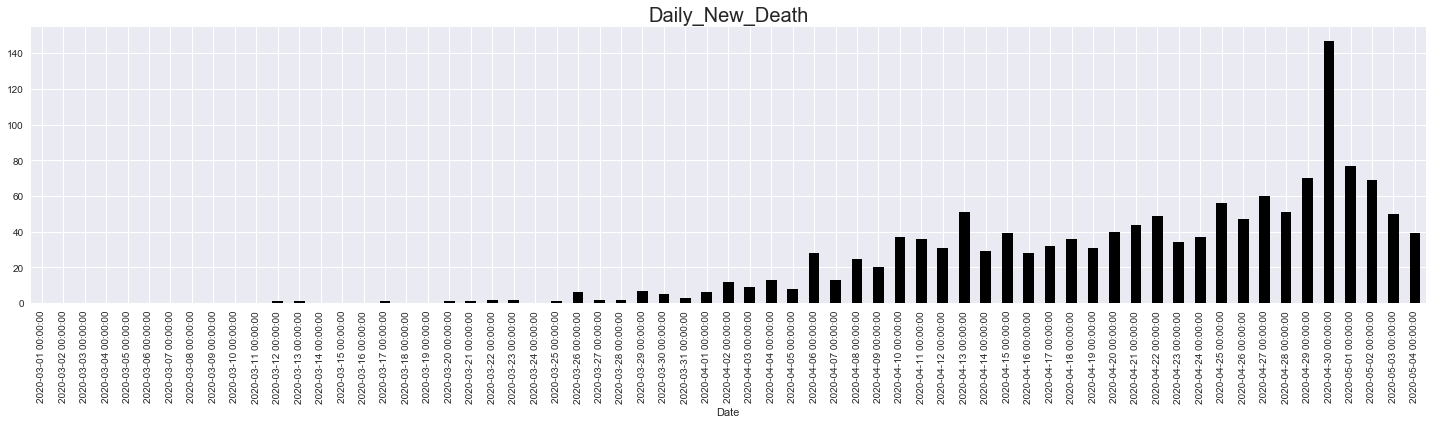

In [14]:
fig4 , ax6 = plt.subplots(figsize=(20,6))
resampled.Daily_New_Death['2020-03':].plot(kind = 'bar', ax=ax6,color='k')

ax6.set_title('Daily_New_Death',fontsize=font_size)

plt.tight_layout()
plt.style.use('seaborn')

STATE WISE STATS

In [15]:
#File Path and Import .csv
states_data_path = '/Users/dinaeshs/Covid_19_India/data/latest_state_data.csv'
state_data = pd.read_csv(states_data_path)

In [16]:
#renaming column names and setting index col
state_data.columns = ['State_or_UT','Confirmed_Cases','Discharged','Death']
state_data.set_index('State_or_UT',inplace=True)

In [17]:
#New Coloumn
state_data['Active'] = state_data.Confirmed_Cases-state_data.Discharged-state_data.Death

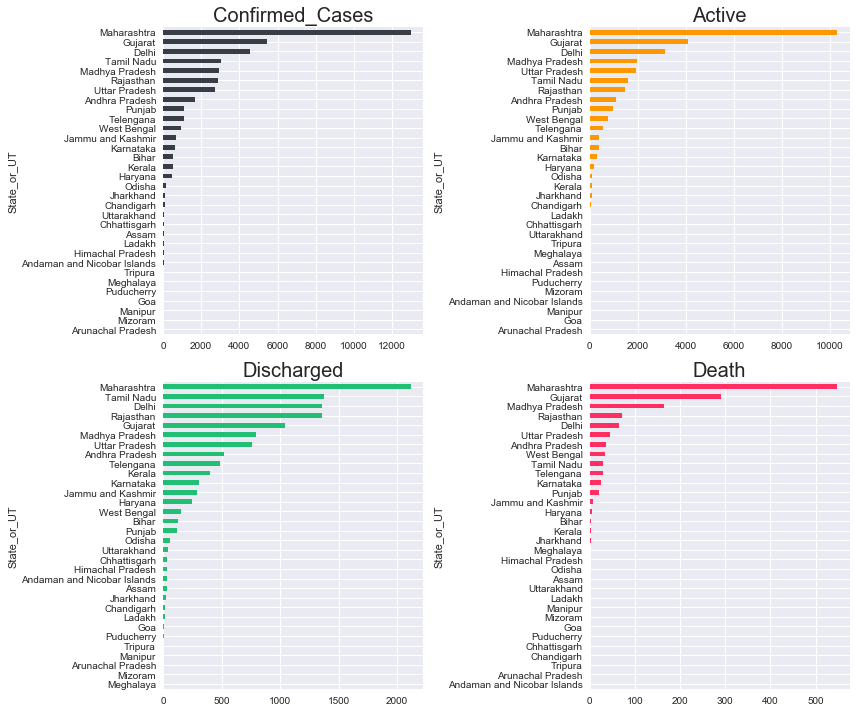

In [18]:
fig5 , ((ax7,ax8),(ax9,ax10)) = plt.subplots(nrows=2,ncols=2,figsize=(12,10))

state_data.Confirmed_Cases.sort_values().plot(kind='barh',ax=ax7,color=cnf)
ax7.set_title('Confirmed_Cases',fontsize=font_size)
state_data.Active.sort_values().plot(kind='barh',ax=ax8,color=act)
ax8.set_title('Active',fontsize=font_size)
state_data.Discharged.sort_values().plot(kind='barh',ax=ax9,color=rec)
ax9.set_title('Discharged',fontsize=font_size)
state_data.Death.sort_values().plot(kind='barh',ax=ax10,color=dth)
ax10.set_title('Death',fontsize=font_size)

plt.style.use('tableau-colorblind10')
plt.tight_layout()

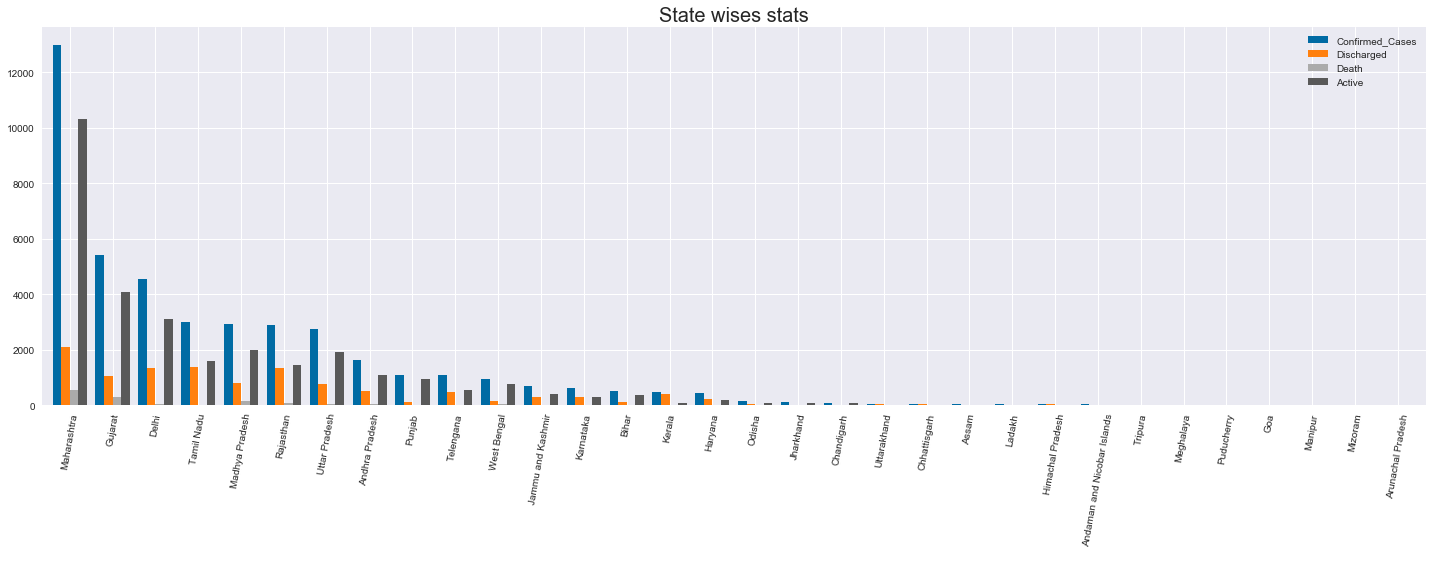

In [19]:
#April 11th,2020 Added df bar chart and sorted
fig8, ax14 = plt.subplots(nrows=1,ncols=1,figsize=(20,8))
state_data.sort_values(by='Confirmed_Cases',ascending=False).plot.bar(rot=80,ax=ax14,width=0.8)
ax14.set_title('State wises stats',fontsize=font_size)
ax14.set_xlabel(' ')
plt.style.use('ggplot')
plt.tight_layout()

In [20]:
"""AGE DATA STATISTICS"""

'AGE DATA STATISTICS'

In [21]:
age_file_name = '/Users/dinaeshs/kaggle_dataset/AgeGroupDetails.csv'
age_df = pd.read_csv(age_file_name,index_col='AgeGroup')

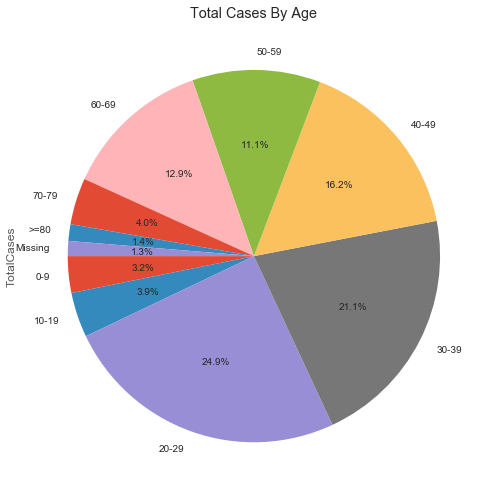

In [22]:
fig7, (ax12)= plt.subplots(nrows=1,ncols=1,figsize=(7,7))
age_df.TotalCases.plot(kind='pie',ax=ax12,legend=False,startangle=180,autopct='%1.1f%%')
ax12.set_title('Total Cases By Age')
plt.style.use('seaborn')
plt.tight_layout()

In [23]:
"""ax13 = plt.subplot(122)
plt.axis('off')
tbl = table(ax13, df, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()"""


"ax13 = plt.subplot(122)\nplt.axis('off')\ntbl = table(ax13, df, loc='center')\ntbl.auto_set_font_size(False)\ntbl.set_fontsize(14)\nplt.show()"

In [24]:
state_data

,Confirmed_Cases,Discharged,Death,Active
State_or_UT,,,,
Andaman and Nicobar Islands,33,32,0,1
Andhra Pradesh,1650,524,36,1090
Arunachal Pradesh,1,1,0,0
Assam,43,32,1,10
Bihar,517,125,4,388
Chandigarh,94,19,0,75
Chhattisgarh,57,36,0,21
Delhi,4549,1362,64,3123
Goa,7,7,0,0
